# TOÁN ỨNG DỤNG THỐNG KÊ
### Lớp: 22_2
### MSSV: 22120157
### Họ tên: Nguyễn Nam Khánh
### Project 5: Linear Regression


### Nội dung
<p>Từ file "wine.csv" là cơ sở đánh giá chất lượng 1200 chai rượu vang theo thang điểm 1-10 dựa trên 11 tinh chất khác nhau. Hãy xây dựng mô hình đánh giá chất lượng rượu sử dụng phương pháp hồi quy tuyến tính</p>

Nghiệm của phương trình hồi quy tuyến tính **Ax = b**
được tính như sau: x = $(A^{T}A)^{-1}A^{T}b$


### Cài đặt các hàm phục vụ cho việc xây dựng mô hình

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)  # Không hiển thị số thực theo dạng 1e-xx

df = pd.read_csv('wine.csv')
# print(df)

# Hàm chuyển vị ma trận
def transpose(A):
    if len(A.shape) == 1:
        A = A.reshape(-1, 1)
    rows, cols = A.shape
    AT = np.zeros((cols, rows))
    for i in range(rows):
        for j in range(cols):
            AT[j][i] = A[i][j]
    return AT

# Hàm tìm ma trận nghịch đảo
def inverse(A):
    #Tạo ma trận đơn vị kích thước bằng ma trận vuông A
    I = np.eye(A.shape[0])
    #Tạo ma trận bổ sung B = (A|I)
    B = np.hstack([A, I])
    rows, cols =  B.shape
    for c in range(cols):   # Duyệt qua từng cột
        if np.all(B[:, c] == 0):    # Nếu tất cả các phần tử trong cột c đều bằng 0 thì kết thúc
            return None

        pivot = None
        for r in range(c, rows):    # Tìm phần tử pivot khác 0 đầu tiên trong cột c
            if B[r, c] != 0:
                pivot = r
                break

        if pivot is None:  
            continue

        # Hoán vị dòng chứa pivot lên vị trí của dòng c
        B[[c, pivot]] = B[[pivot, c]]
        
        # Nhân giá trị của dòng chứa pivot cho 1/pivot
        B[c] = B[c] / B[c, c]

        # Biến các phần tử trên dưới pivot về 0
        for r in range(rows):   
            if r == c:
                continue
            factor = B[r, c] / B[c, c]
            B[r] = B[r] -  factor * B[c]

    #Nếu ma trận B lúc này có dạng [I, A^-1] thì trả về ma trận nghịch đảo
    if np.all(B[:, :cols//2] == I):
        return B[:, cols//2:]
    else:
        return None

# Hàm nhân 2 ma trận
def matrix_multiply(A, B):
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape
    result = np.zeros((rows_A, cols_B))
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i, j] += A[i, k] * B[k, j]
    return result

# Hàm tính theta
def theta(A, b):
    A_transpose_A = matrix_multiply(A.T, A)
    A_transpose_b = matrix_multiply(A.T, b)
    A_transpose_A_inv = inverse(A_transpose_A)
    return matrix_multiply(A_transpose_A_inv, A_transpose_b)

# Hàm tính norm
def norm(A, b, theta):
    error_vector = matrix_multiply(A, theta)  # Tính A * theta
    for i in range(len(error_vector)):
        error_vector[i] -= b[i][0]            # Trừ đi b
    sum_of_squares = 0
    for x in error_vector:
        sum_of_squares += x**2
    return sum_of_squares ** 0.5

# Hàm lấy ma trận A và vector b từ dữ liệu
def getAb(x, y):
    col1 = np.ones(len(x))  # Tạo mảng phần tử 1 với số phần tử bằng số phần tử của x
    colx = transpose(np.array(x))  # Chuyển vị ma trận x
    A = transpose(np.vstack((col1, colx)))   # Gộp cột 1 và cột x
    b = np.array(y).reshape(len(y), 1)  # Chuyển y thành ma trận cột
    return A, b

### Câu a: Sử dụng 11 đặc trưng đề bài cung cấp để xây dựng mô hình

In [18]:
# Hàm xây dựng mô hình tuyến tính
def linear_model():
  x = (df.iloc[:, 1:11]).to_numpy() # Lấy các cột từ 1 đến 11
  y = (df.iloc[:, 0]).to_numpy()    # Lấy cột 0
  A, b = getAb(x, y)   
  print(theta(A, b)) 
  print(norm(A, b, theta(A, b)))

linear_model()

[[ 209.67651937]
 [   0.19383951]
 [  -0.92683787]
 [  -0.03170354]
 [   0.12551858]
 [  -1.76031674]
 [   0.00382846]
 [  -0.00464975]
 [-208.97867923]
 [   0.74622261]
 [   1.057678  ]]
[22.86724491]


### Câu b: Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất

Norm cho đặc trưng "fixed acidity": [27.70877661]

Norm cho đặc trưng "volatile acidity": [25.92104626]

Norm cho đặc trưng "citric acid": [27.2823261]

Norm cho đặc trưng "residual sugar": [27.98804766]

Norm cho đặc trưng "chlorides": [27.80382916]

Norm cho đặc trưng "free sulfur dioxide": [27.94287547]

Norm cho đặc trưng "total sulfur dioxide": [27.29098207]

Norm cho đặc trưng "density": [27.49784058]

Norm cho đặc trưng "pH": [27.94140815]

Norm cho đặc trưng "sulphates": [27.38855032]

Norm cho đặc trưng "alcohol": [24.18005278]

Đặc trưng được chọn có loss value nhỏ nhất là: "alcohol"
x: [ 9.4  9.8  9.8 ...  9.5  9.8 10.9]
Giá trị norm nhỏ nhất: [24.18005278]


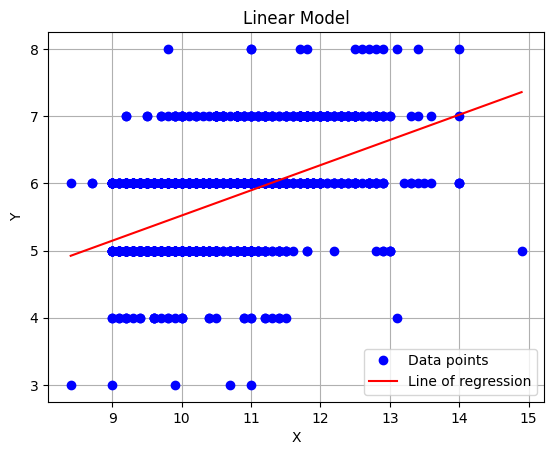

In [15]:
# Hàm hiển thị biểu đồ
def show(xs, ys, theta):
    plt.plot(xs, ys, "o", color="blue") # Vẽ các điểm dữ liệu
    ts = np.linspace(np.min(xs), np.max(xs), 50) # Tạo 50 điểm trong khoảng từ min(xs) đến max(xs)
    yts = theta[0] + theta[1] * ts  # Tính giá trị y tương ứng với các điểm ts
    plt.plot(ts, yts, color="red")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Linear Model")
    plt.legend(["Data points", "Line of regression"])
    plt.grid(True)
    plt.show()

def best_model():
    y = df.iloc[:, 0].to_numpy()

    for i in range(1, 12):
        x = df.iloc[:, i].to_numpy()
        A, b = getAb(x, y)
        current_norm = norm(A, b, theta(A, b))
        print(f"Norm cho đặc trưng {df.columns[i]}: {current_norm}\n")

        if i == 1 or current_norm < temp:
            temp = current_norm
            col = x
            index = i
    print(f"Đặc trưng được chọn có loss value nhỏ nhất là: {df.columns[index]}")
    print("x:", col)
    print(f"Giá trị norm nhỏ nhất: {temp}")

    show(col, y, theta(A, b))

best_model()

### Câu c: Xây dựng mô hình của riêng bạn cho kết quả tốt nhất

In [10]:
#Cau c: Xay dung mo hinh cho ket qua tot nhat. Chon mo hinh Y = theta1 + theta2 * X + theta3 * X^2
def getAb_my_model(x, y):
    col1 = np.ones(len(x))
    colx = transpose(np.array(x))
    A = transpose(np.vstack((col1, colx, colx**2)))
    b = np.array(y).reshape(len(y), 1)
    return A, b


def my_model():
    x = df.iloc[:, 1:12].to_numpy()
    y = df.iloc[:, 0].to_numpy()
    A, b = getAb_my_model(x, y)
    model_theta = theta(A, b)
    model_norm = norm(A, b, model_theta)
    print("Theta values:\n", model_theta)
    print("Norm value:", model_norm)

my_model()

Theta values: [[  6179.74360097]
 [     0.29287636]
 [    -1.01527478]
 [    -1.15962306]
 [     0.05682026]
 [    -1.03629623]
 [     0.01268377]
 [    -0.00606567]
 [-12354.49167427]
 [     3.30417055]
 [     3.23884829]
 [     0.53317994]
 [    -0.01375975]
 [    -0.00134724]
 [     1.3922467 ]
 [    -0.00262055]
 [    -1.20834494]
 [    -0.00020313]
 [     0.00001642]
 [  6169.17202516]
 [    -0.55323669]
 [    -1.34248128]
 [    -0.01360817]]
Norm value: [21.59595188]


### Mô tả các hàm
- Hàm theta: dùng để tìm nghiệm của phương trình hồi quy
- Hàm norm: tính chuẩn vector phần dư
- Hàm show(xs, ys, theta): vẽ biểu đồ 
- Hàm linear_model(): xây dựng mô hình hồi quy tuyến tính cho 11 cột
- Hàm best_model(): tìm đặc trưng tốt nhất(có norm bé nhất) dựa trên dữ liệu của từng cột với cột quality
- Hàm my_model(): xây dựng mô hình hồi quy tuyến tính tốt cho 11 cột dữ liệu, tốt hơn mô hình ban đầu